In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Traffic_Volume_Counts_20250314.csv')

# Optional: inspect columns to see actual names
print(df.columns)
print(df.head())


Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')
   ID  SegmentID  Roadway Name         From                To Direction  \
0   1      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
1   2      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
2   3      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
3   4      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
4   5      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   

         Date  12:00-1:00 AM  1:00

In [3]:
print(df.columns)


Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')


In [4]:
hour_cols = [
    '8:00-9:00AM','9:00-10:00AM','10:00-11:00AM', # etc.
]


In [5]:
df['Volume'] = df[hour_cols].sum(axis=1)


In [6]:
volume_by_road = df.groupby('Roadway Name', as_index=False)['Volume'].sum()


<ipython-input-7-f80290989c2d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_road_top20, x='Total Volume', y='Roadway Name', orient='h', palette='viridis')


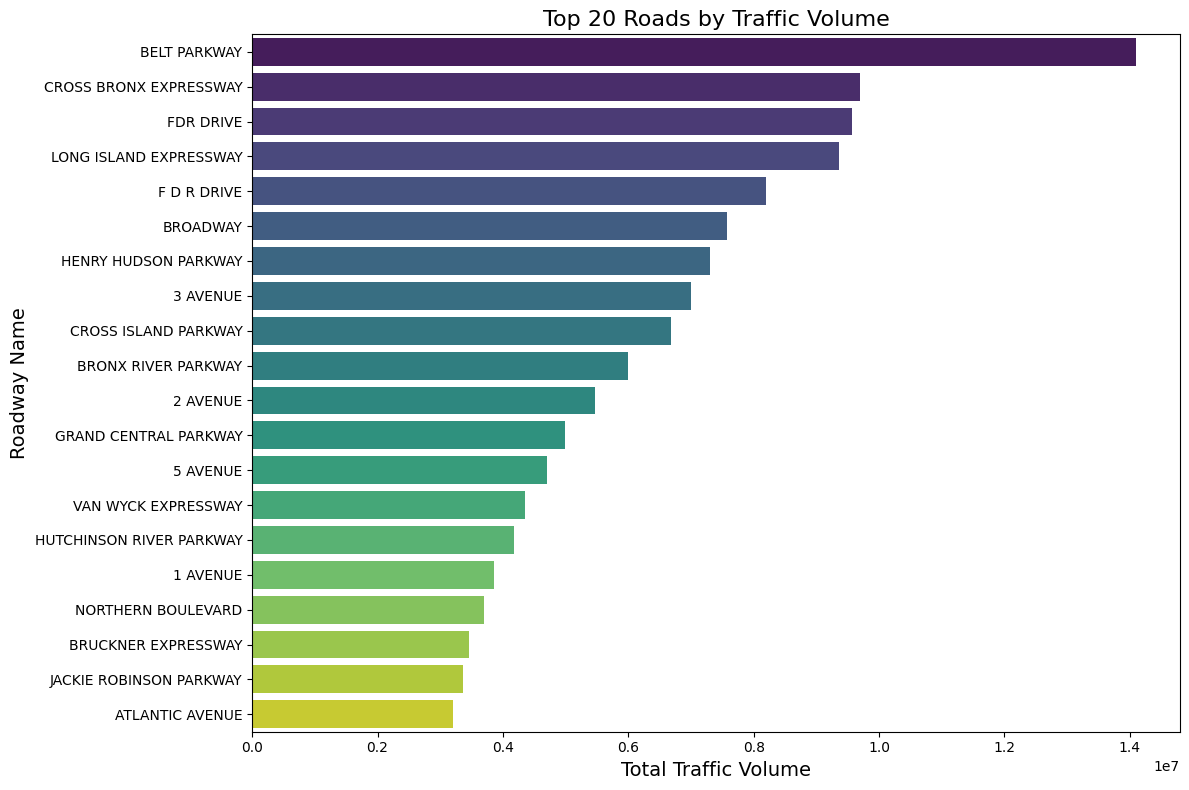

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Traffic_Volume_Counts_20250314.csv')

df['Roadway Name'] = df['Roadway Name'].str.upper().str.strip()

hourly_columns = df.columns[7:]

# Summing total volume by road using hourly columns
df['Total Volume'] = df[hourly_columns].sum(axis=1)
volume_by_road = df.groupby('Roadway Name', as_index=False)['Total Volume'].sum()

volume_by_road_top20 = volume_by_road.sort_values('Total Volume', ascending=False).head(20)


plt.figure(figsize=(12, 8))
sns.barplot(data=volume_by_road_top20, x='Total Volume', y='Roadway Name', orient='h', palette='viridis')

# Titles and labels
plt.title('Top 20 Roads by Traffic Volume', fontsize=16)
plt.xlabel('Total Traffic Volume', fontsize=14)
plt.ylabel('Roadway Name', fontsize=14)

plt.tight_layout()
plt.show()




In [12]:
# Convert 'Date' column to datetime format if not already done
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Extract 'Year' from 'Date'
df["Year"] = df["Date"].dt.year

# Verify that 'Year' is now in the dataset
print(df[["Date", "Year"]].head())  # Check if Year column is correctly extracted



        Date  Year
0 2012-01-09  2012
1 2012-01-10  2012
2 2012-01-11  2012
3 2012-01-12  2012
4 2012-01-13  2012


In [13]:
# Define a mapping of roadways to boroughs
borough_mapping = {
    "MANHATTAN": ["BROADWAY", "5TH AVENUE", "PARK AVENUE", "LEXINGTON AVENUE"],
    "BROOKLYN": ["ATLANTIC AVENUE", "FLATBUSH AVENUE", "BEDFORD AVENUE"],
    "QUEENS": ["QUEENS BOULEVARD", "NORTHERN BOULEVARD", "JAMAICA AVENUE"],
    "BRONX": ["GRAND CONCOURSE", "FORDHAM ROAD", "BOSTON ROAD"],
    "STATEN ISLAND": ["RICHMOND AVENUE", "VICTORY BOULEVARD", "HYLAN BOULEVARD"]
}

# Function to assign borough based on roadway name
def assign_borough(roadway_name):
    for borough, roads in borough_mapping.items():
        if isinstance(roadway_name, str) and any(road in roadway_name.upper() for road in roads):
            return borough
    return "UNKNOWN"

# Apply the function to create a Borough column
df["Borough"] = df["Roadway Name"].apply(assign_borough)

print(df[["Roadway Name", "Borough"]].head())

# Save to CSV if needed
df.to_csv("dataset_with_boroughs.csv", index=False)
print("File saved as dataset_with_boroughs.csv")




   Roadway Name  Borough
0  BEACH STREET  UNKNOWN
1  BEACH STREET  UNKNOWN
2  BEACH STREET  UNKNOWN
3  BEACH STREET  UNKNOWN
4  BEACH STREET  UNKNOWN
File saved as dataset_with_boroughs.csv


In [19]:
time_columns = df.columns[7:-2]  # Excluding non-time columns
df["Total Traffic"] = df[time_columns].sum(axis=1)


In [20]:
time_columns = df.columns[7:-2]
df["Total Traffic"] = df[time_columns].sum(axis=1)

# Aggregate traffic volume per borough per year
borough_violation_trend = df.groupby(["Year", "Borough"])["Total Traffic"].sum().reset_index()

print(borough_violation_trend.head())

# Optionally save the output to a CSV file
borough_violation_trend.to_csv("borough_violation_trend.csv", index=False)
print("File saved as borough_violation_trend.csv")



   Year        Borough  Total Traffic
0  2012          BRONX      2502660.0
1  2012       BROOKLYN      2688176.0
2  2012      MANHATTAN      7390630.0
3  2012         QUEENS      2274070.0
4  2012  STATEN ISLAND      1304550.0
File saved as borough_violation_trend.csv


In [21]:
# Convert all hourly columns to numeric (
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce')

# Summing all hourly traffic columns to get total traffic per row
df["Total Traffic"] = df[time_columns].sum(axis=1)

# Aggregate traffic volume per borough per year
borough_violation_trend = df.groupby(["Year", "Borough"])["Total Traffic"].sum().reset_index()

print(borough_violation_trend.head())  # Print first few rows


borough_violation_trend.to_csv("borough_violation_trend.csv", index=False)
print("File saved as 'borough_violation_trend.csv'")



   Year        Borough  Total Traffic
0  2012          BRONX      2502660.0
1  2012       BROOKLYN      2688176.0
2  2012      MANHATTAN      7390630.0
3  2012         QUEENS      2274070.0
4  2012  STATEN ISLAND      1304550.0
File saved as 'borough_violation_trend.csv'


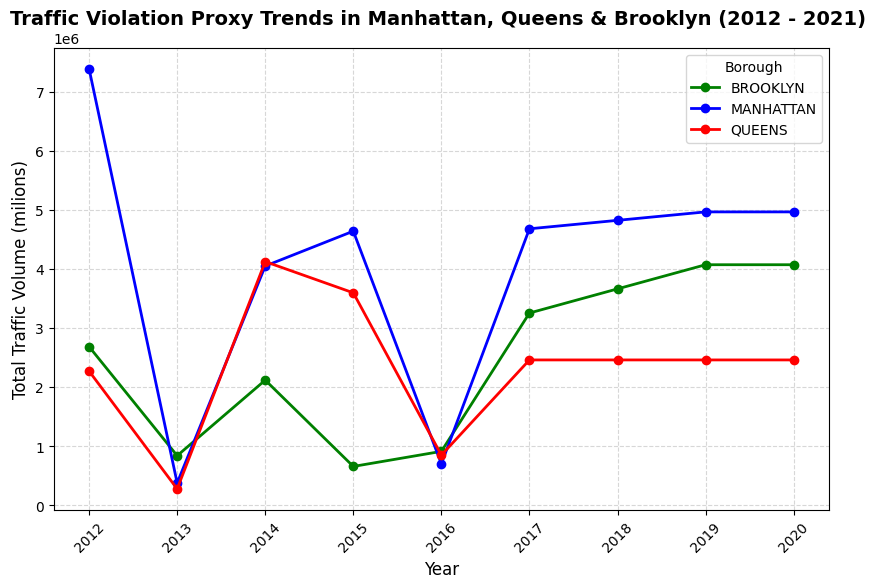

In [22]:
time_columns = df.columns[7:-2]
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce')

# Summing all hourly
df["Total Traffic"] = df[time_columns].sum(axis=1)

# Aggregate traffic volume
borough_violation_trend = df.groupby(["Year", "Borough"])["Total Traffic"].sum().reset_index()

selected_boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN"]

filtered_traffic = borough_violation_trend[borough_violation_trend["Borough"].isin(selected_boroughs)]

selected_pivot = filtered_traffic.pivot(index="Year", columns="Borough", values="Total Traffic")

selected_pivot_interpolated = selected_pivot.reindex(range(2012, 2021)).interpolate()

colors = {"MANHATTAN": "blue", "QUEENS": "red", "BROOKLYN": "green"}

plt.figure(figsize=(10, 6))

for borough in selected_pivot_interpolated.columns:
    plt.plot(selected_pivot_interpolated.index, selected_pivot_interpolated[borough], marker="o", linestyle="-", linewidth=2, color=colors[borough], label=borough)


# Customizing the visualization
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Traffic Volume (milions)", fontsize=12)
plt.title("Traffic Violation Proxy Trends in Manhattan, Queens & Brooklyn (2012 - 2021) ", fontsize=14, fontweight='bold')
plt.xticks(selected_pivot_interpolated.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Borough")

# Show the visualization
plt.show()


In [ ]:
s